<a href="https://colab.research.google.com/github/haishesauke/MLops/blob/main/iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

#Reading Data


In [ ]:
df = pd.read_csv('IRIS.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking the Statistical Parameters
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Now We will do Exploratory Data Analysis

In [ ]:
# checking for null or missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.nunique()    #shows number of unique elements

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

#visualization

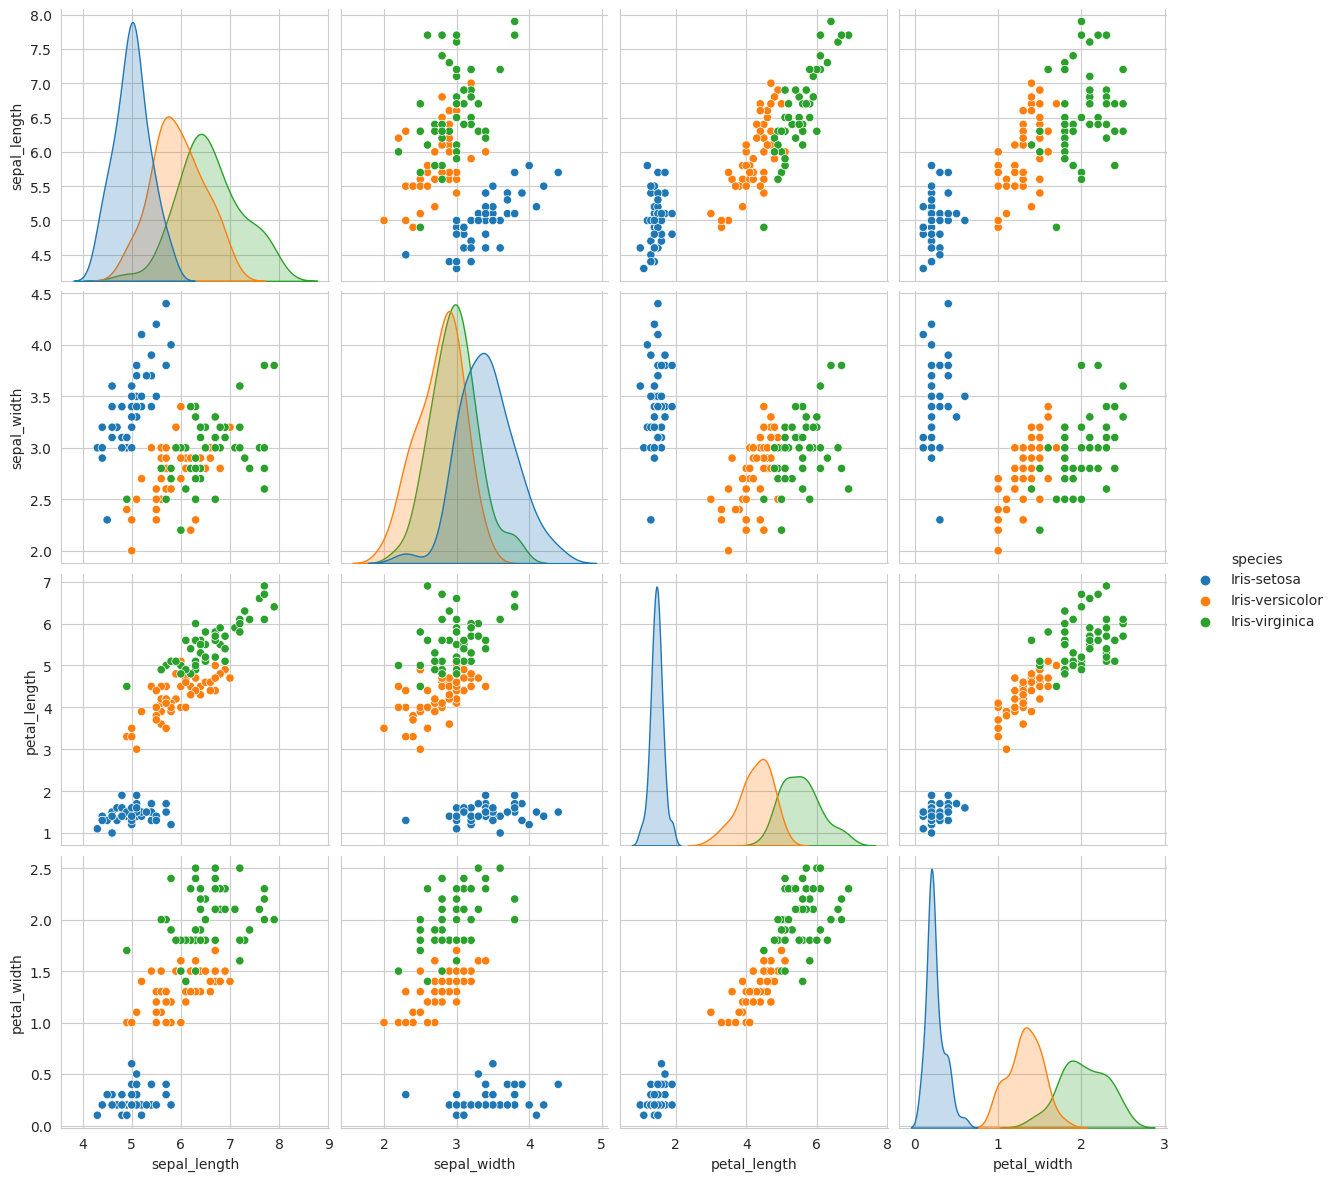

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3);
plt.show()

In [ ]:
# Petal lenght vs Species
fig = px.scatter(data_frame = df , x = 'petal_length', color = 'species')
fig.update_layout(width = 800, height = 600,
           xaxis = dict(title = 'petal_length', color ='#E066FF'),
           yaxis = dict(title = 'species', color ='#E066FF'))
fig.show()

# Petal Width vs Species
fig = px.scatter(data_frame = df , x = 'petal_width', color = 'species')
fig.update_layout(width = 800, height = 600,
           xaxis = dict(title = 'petal_width', color ='#E066FF'),
           yaxis = dict(title = 'species', color ='#E066FF'))
fig.show()

In [ ]:
# Sepal length vs Species
fig = px.scatter(data_frame = df, x = 'sepal_length', color = 'species')
fig.update_layout(width = 800, height = 600,
                  xaxis = dict(title = 'sepal_length', color ="#7B68EE"),
                  yaxis = dict(title = "Species", color = "#7B68EE" ))
fig.show()

# Sepal width vs Species
fig = px.scatter(data_frame = df, x = 'sepal_width', color = 'species')
fig.update_layout(width = 800, height = 600,
                  xaxis = dict(title = 'sepal_width', color ="#7B68EE"),
                  yaxis = dict(title = "Species", color = "#7B68EE" ))
fig.show()


#k_means Clustering

In [ ]:
x = df.iloc[: , [0,1,2,3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

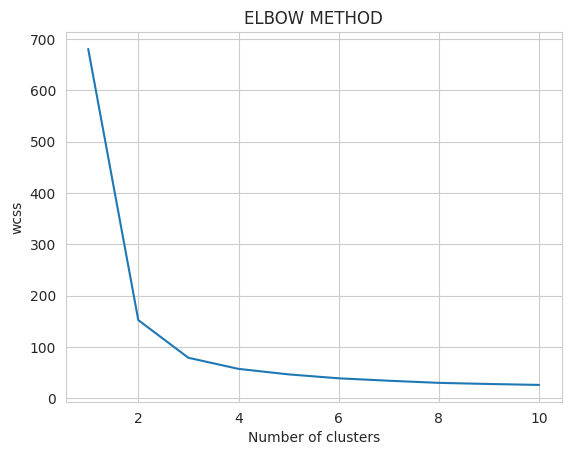

In [ ]:
# using elbow method
plt.plot(range(1,11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# will provide number of clusters
from kneed import KneeLocator
k = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')
k.elbow

3

In [ ]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}
kmeans = KMeans(n_clusters = 3, **kmeans_set)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
centroid = kmeans.cluster_centers_
print(centroid)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


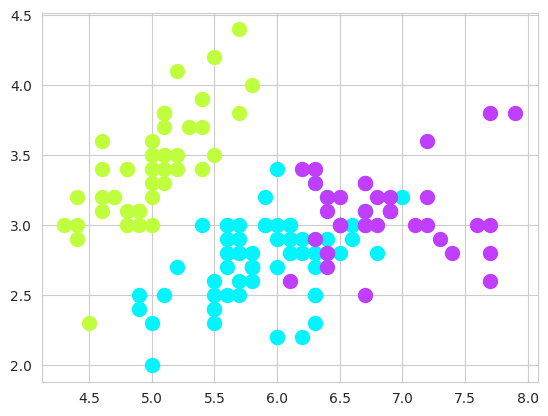

In [ ]:
# cluster visulaization
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
            s = 100, c = "#00F5FF", label = 'Iris_Setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
            s = 100, c = "#C0FF3E", label = 'Iris_Versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
            s = 100, c = "#BF3EFF", label = 'Iris_Virginica')

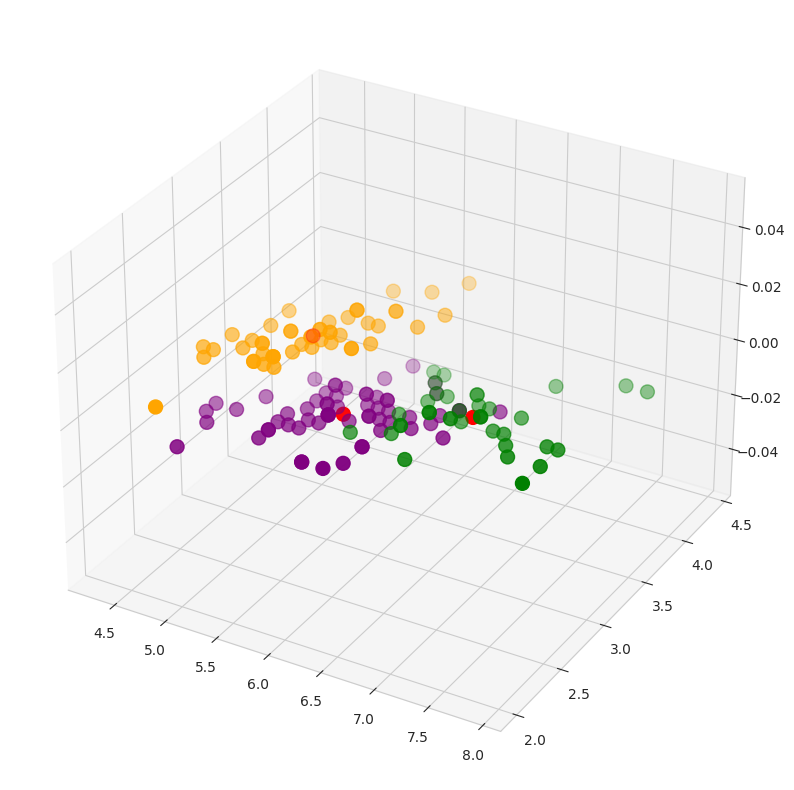

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [ ]:
# dividing data into groups
kmeans = KMeans(n_clusters = 3, **kmeans_set).fit(x)
cluster = kmeans.labels_

df['ClusterNumber'] = cluster
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,ClusterNumber
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [ ]:
X = df.iloc[:,:-1]
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x[y_kmeans == 0, 0], y=x[y_kmeans == 0, 1],
    mode='markers',marker_color='#00FFFF',name='Iris-setosa'
))

fig.add_trace(go.Scatter(
    x=x[y_kmeans == 1, 0], y=x[y_kmeans == 1, 1],
    mode='markers',marker_color='#7FFF00',name='Iris-versicolour'
))

fig.add_trace(go.Scatter(
    x=x[y_kmeans == 2, 0], y=x[y_kmeans == 2, 1],
    mode='markers',marker_color='#FF6EB4',name='Iris-virginica'
))

fig.add_trace(go.Scatter(
    x=centroid[:, 0], y=centroid[:,1],
    mode='markers',marker_color='#FF4500',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='plotly_dark',width=1000, height=500,)

# Machine Learing Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y_kmeans, test_size=0.2, random_state=42)

# Choose a classification algorithm (Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00
